## Import libraries

In [1]:
# Import the necessary packages
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import optimizers


Using TensorFlow backend.


In [2]:
file = pd.read_csv('KeyFacialPoints.csv')

In [3]:
file.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [4]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
left_eye_center_x            2140 non-null float64
left_eye_center_y            2140 non-null float64
right_eye_center_x           2140 non-null float64
right_eye_center_y           2140 non-null float64
left_eye_inner_corner_x      2140 non-null float64
left_eye_inner_corner_y      2140 non-null float64
left_eye_outer_corner_x      2140 non-null float64
left_eye_outer_corner_y      2140 non-null float64
right_eye_inner_corner_x     2140 non-null float64
right_eye_inner_corner_y     2140 non-null float64
right_eye_outer_corner_x     2140 non-null float64
right_eye_outer_corner_y     2140 non-null float64
left_eyebrow_inner_end_x     2140 non-null float64
left_eyebrow_inner_end_y     2140 non-null float64
left_eyebrow_outer_end_x     2140 non-null float64
left_eyebrow_outer_end_y     2140 non-null float64
right_eyebrow_inner_end_x    2140 non-null float64
right_eyebrow_inner_end_y 

In [5]:
file['Image'] = file['Image'].apply(lambda x:np.fromstring(x,dtype=float,sep=' ').reshape(96,96))

In [6]:
type(file['Image'])

pandas.core.series.Series

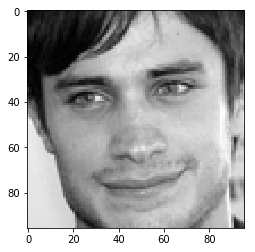

In [7]:
plt.imshow(file['Image'][2100],cmap='gray')

In [8]:
file.shape

(2140, 31)

In [9]:
# to see if there are any missing values
file.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

## Visualization

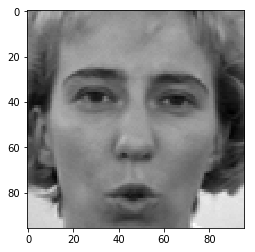

In [10]:
i = np.random.randint(1,len(file))
plt.imshow(file['Image'][i],cmap='gray')

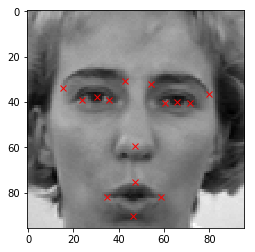

In [11]:
plt.figure()
plt.imshow(file['Image'][i],cmap='gray')
for j in range(1,31,2):
    plt.plot(file.loc[i][j-1],file.loc[i][j],'rx')

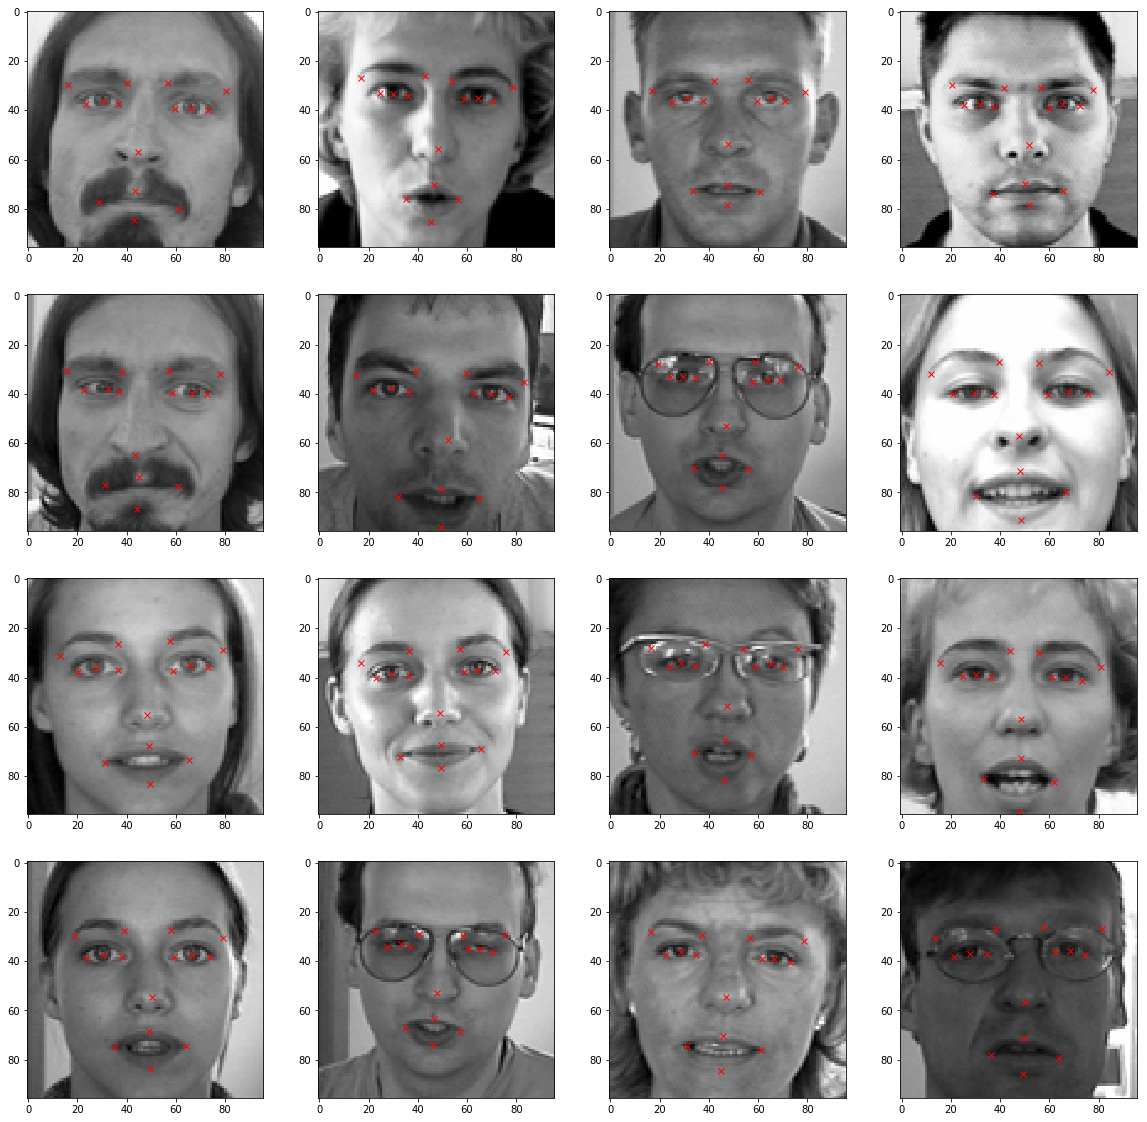

In [12]:
fig = plt.figure(figsize=(20,20))

for i in range(16):
    ax = fig.add_subplot(4,4, i + 1)
    plt.imshow(file['Image'][i],cmap='gray')
    for j in range(1,31,2):
        plt.plot(file.loc[i][j-1],file.loc[i][j],'rx')

## Image Augmentation

#### flipng images horizontally

In [13]:
import copy
file_copy = file.copy()

In [14]:
columns = file_copy.columns[:-1]

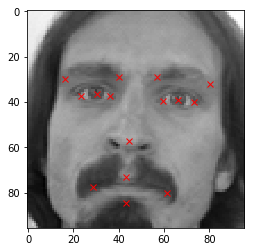

In [15]:
# actual Image
plt.figure()
plt.imshow(file['Image'][0],cmap='gray')
for j in range(1,31,2):
    plt.plot(file.loc[0][j-1],file.loc[0][j],'rx')

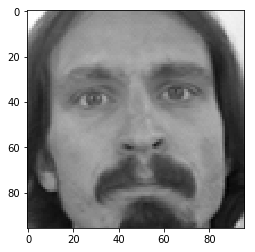

In [16]:
img_flip = np.flip(file_copy['Image'][0],axis=1)
plt.imshow(img_flip,cmap='gray')

In [17]:
file_copy['Image'] = file_copy['Image'].apply(lambda x:np.flip(x,1))

In [18]:
for i in range(len(columns)):
    if i%2==0:
        file_copy[columns[i]] = file_copy[columns[i]].apply(lambda x:96.-float(x))

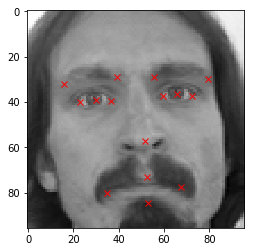

In [19]:
# fliped image--- horizontally
plt.figure()
plt.imshow(file_copy['Image'][0],cmap='gray')
for j in range(1,31,2):
    plt.plot(file_copy.loc[0][j-1],file_copy.loc[0][j],'rx')

In [20]:
file_augmented = np.concatenate((file,file_copy))

In [21]:
file_augmented.shape

(4280, 31)

#### randomly increasing image brightness

In [22]:
frame = pd.DataFrame(file_augmented)

In [23]:
import random
file_copy2 = frame.copy()
file_copy2[30] = frame[30].apply(lambda x:np.clip(random.uniform(0,2)*x,0.0,255.0))

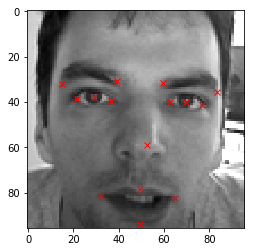

In [39]:
plt.imshow(file_copy2[30][5],cmap='gray')
for j in range(1,31,2):
    plt.plot(file_copy2.loc[5][j-1],file_copy2.loc[5][j],'rx')

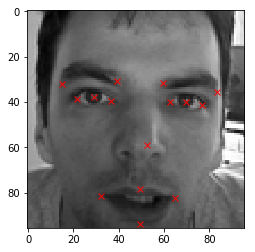

In [40]:
plt.imshow(frame[30][5],cmap='gray')
for j in range(1,31,2):
    plt.plot(frame.loc[5][j-1],frame.loc[5][j],'rx')

In [26]:
file_augmented_2 = np.concatenate((file_augmented,file_copy2))

In [27]:
file_augmented_2.shape

(8560, 31)

## Normalization and data preparation

In [28]:
img = file_augmented_2[:,30]
img = img/255

In [29]:
# we nedd to expand the dimension for X[0] from (96,96) to (96,96,1)
X = np.empty((len(img),96,96,1))
for i in range(len(img)):
    X[i] = np.expand_dims(img[i],2)

In [30]:
X.shape

(8560, 96, 96, 1)

In [31]:
X = np.asanyarray(X,dtype=np.float32)

In [32]:
# we don't need any dimension expansion for y
y = file_augmented_2[:,:30]
y = np.asanyarray(y,dtype=np.float32)
y.shape

(8560, 30)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

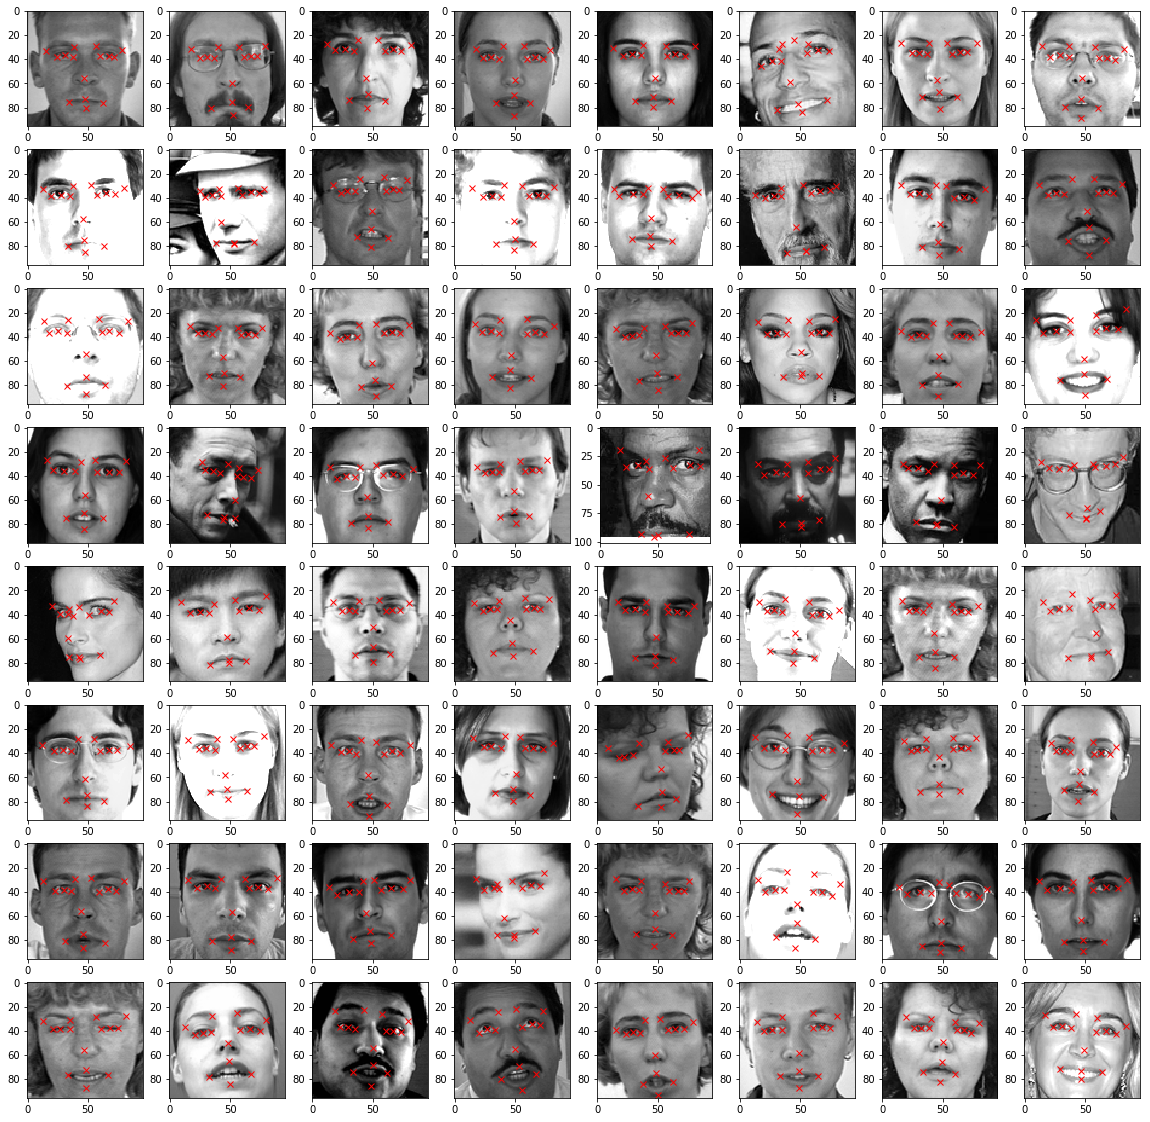

In [34]:
# Let's view more images in a grid format
fig = plt.figure(figsize=(20, 20))

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1)    
    image = plt.imshow(X_train[i].reshape(96,96), cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(y_train[i][j-1], y_train[i][j], 'rx')
    

## Res-NN Model building 

In [35]:
def res_block(X,filter,stage):
    
    X_copy = X
    f1,f2,f3 = filter
    # CONV BLOCK
    # Main path 
    X = Conv2D(f1,(1,1),strides=(1,1),padding='valid',name='res_'+str(stage)+'_conv_a',kernel_initializer=glorot_uniform(seed=0))(X)
    X = MaxPool2D()(X)
    X = BatchNormalization(axis=3,name='bn_'+str(stage)+'_conv_a')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(f2,(3,3),padding='same',name='res_'+str(stage)+'_conv_b',kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3,name='bn_'+str(stage)+'_conv_b')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(f3,(1,1),padding='valid',name='res_'+str(stage)+'_conv_c',kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3,name='bn_'+str(stage)+'_conv_c')(X)
    
    # short-cut path
    X_copy = Conv2D(f3,(1,1),padding='valid',name='res_'+str(stage)+'_conv_copy',kernel_initializer=glorot_uniform(seed=0))(X_copy)
    X_copy = MaxPool2D()(X_copy)
    X_copy = BatchNormalization(axis=3,name='bn_'+str(stage)+'_conv_copy')(X_copy)
    
    # adding
    X = Add()([X,X_copy])
    X = Activation('relu')(X)
    
    # IDENTITY BLOCK 1
    X_copy = X
    # main path
    X = Conv2D(f1,(1,1),padding='valid',name='res_'+str(stage)+'_identity_1a',kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3,name='bn_'+str(stage)+'_identity_1a')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(f2,(3,3),padding='same',name='res_'+str(stage)+'_identity_1b',kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3,name='bn_'+str(stage)+'_identity_1b')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(f3,(1,1),name='res_'+str(stage)+'_identity_1c',kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3,name='bn_'+str(stage)+'_identity_1c')(X)
    # add
    X = Add()([X,X_copy])
    X = Activation('relu')(X)
    
    # IDENTITY BLOCK 2
    X_copy = X
    # main path
    X = Conv2D(f1,(1,1),padding='valid',name='res_'+str(stage)+'_identity_2a',kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3,name='bn_'+str(stage)+'_identity_2a')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(f2,(3,3),padding='same',name='res_'+str(stage)+'_identity_2b',kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3,name='bn_'+str(stage)+'_identity_2b')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(f3,(1,1),name='res_'+str(stage)+'_identity_2c',kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3,name='bn_'+str(stage)+'_identity_2c')(X)
    # add
    X = Add()([X,X_copy])
    X = Activation('relu')(X)
    
    return X

In [42]:
input_shape = (96,96,1)

X_input = Input(shape=input_shape)

# Main Model
X = ZeroPadding2D((3,3))(X_input)

# stage--1
X = Conv2D(64,(7,7),strides=(2,2),name='conv1',kernel_initializer=glorot_uniform(seed=0))(X)
X = BatchNormalization(axis=3,name='bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPool2D((3,3),strides=(2,2))(X)

# stage--2
X = res_block(X,[64,64,256],2)

# stage--3
X = res_block(X,[128,128,512],3)

# Average pooling
X = AveragePooling2D((2,2),name='average_Pooling')(X)

# Final Layer
X = Flatten()(X)
X = Dense(4096,activation='relu')(X)
X = Dropout(0.2)(X)
X = Dense(2048,activation='relu')(X)
X = Dropout(0.1)(X)
#X = Dense(512,activation='relu')(X)
X = Dense(256,activation='relu')(X)
X = Dense(30,activation='relu')(X)

model = Model(inputs=X_input,outputs=X)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 96, 96, 1)    0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 102, 102, 1)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 48, 48, 64)   3200        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 48, 48, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

## Model Compilation and Training

In [43]:
adam = tf.keras.optimizers.Adam()
model.compile(optimizer=adam,loss='mean_squared_error',metrics=['accuracy'])

In [44]:
checkpointer = ModelCheckpoint(filepath='model1.hdf5',verbose=1,save_best_only=True,period=1)

In [45]:
history = model.fit(X_train,y_train,batch_size=None,epochs=5,validation_split=0.05,callbacks=[checkpointer])

Train on 7318 samples, validate on 386 samples
Epoch 1/5
7318/7318 [==============================] - 229s 31ms/step - loss: 241.2503 - acc: 0.6433 - val_loss: 299.9385 - val_acc: 0.6451

Epoch 00001: val_loss improved from inf to 299.93850, saving model to model1.hdf5
Epoch 2/5
7318/7318 [==============================] - 233s 32ms/step - loss: 115.0438 - acc: 0.6619 - val_loss: 134.3291 - val_acc: 0.6477

Epoch 00002: val_loss improved from 299.93850 to 134.32912, saving model to model1.hdf5
Epoch 3/5
7318/7318 [==============================] - 230s 31ms/step - loss: 85.6825 - acc: 0.6567 - val_loss: 126.9121 - val_acc: 0.6373

Epoch 00003: val_loss improved from 134.32912 to 126.91215, saving model to model1.hdf5
Epoch 4/5
7318/7318 [==============================] - 231s 32ms/step - loss: 71.1753 - acc: 0.6546 - val_loss: 94.0703 - val_acc: 0.6477

Epoch 00004: val_loss improved from 126.91215 to 94.07031, saving model to model1.hdf5
Epoch 5/5
7318/7318 [==========================

## Assess trained model's performance

In [46]:
results = model.evaluate(X_test,y_test)

856/856 [==============================] - 6s 7ms/step


In [48]:
print(f'loss:{results[0]}')
print(f'accuracy:{results[1]}')

loss:103.47499505158896
accuracy:0.6869158878504673


In [49]:
# getting model history
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

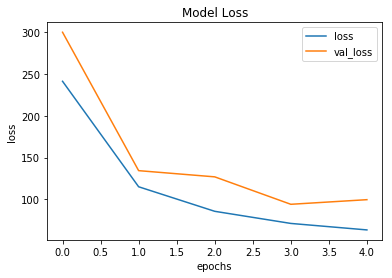

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['loss','val_loss'],loc='upper right')
plt.show()

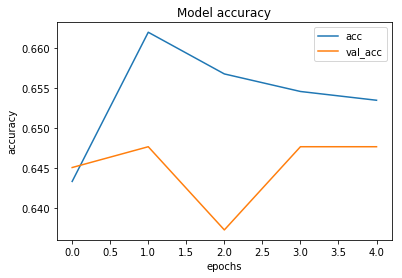

In [52]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['acc','val_acc'],loc='upper right')
plt.show()

In [54]:
df_predict = model.predict(X_test)

In [62]:
df_predict = pd.DataFrame(df_predict,columns=columns)
df_predict.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,36.116211,38.602180,59.069889,38.767067,42.036507,39.723656,32.709873,38.955761,55.315948,38.204220,...,47.702389,58.037983,38.396122,77.511642,59.106796,76.505798,48.065498,72.897392,47.956238,84.408363
1,29.296709,37.191822,66.728218,37.689472,37.344048,39.379517,22.755125,38.701584,59.921299,37.621864,...,47.291252,56.894852,32.816250,76.179916,64.738716,75.887657,47.178352,70.378441,47.828224,84.141357
2,66.718033,37.282352,29.050827,37.424591,61.047966,37.468666,74.319740,37.271164,36.988827,38.452927,...,47.086742,56.835098,63.072338,75.330261,33.586075,74.516693,47.154118,71.378250,47.477280,83.841637
3,70.786949,38.830315,28.934523,38.173370,63.899151,38.835613,79.558228,38.862164,37.457275,39.889080,...,49.247135,58.218994,66.036392,77.912468,33.129185,76.926353,48.776402,73.609344,49.525795,87.892296
4,59.577278,39.847309,43.314800,40.941078,57.761707,42.583450,63.756523,41.086990,47.769939,42.528656,...,51.065830,63.989624,59.492603,82.242561,47.373974,81.759956,51.288177,81.479050,51.663399,88.414833


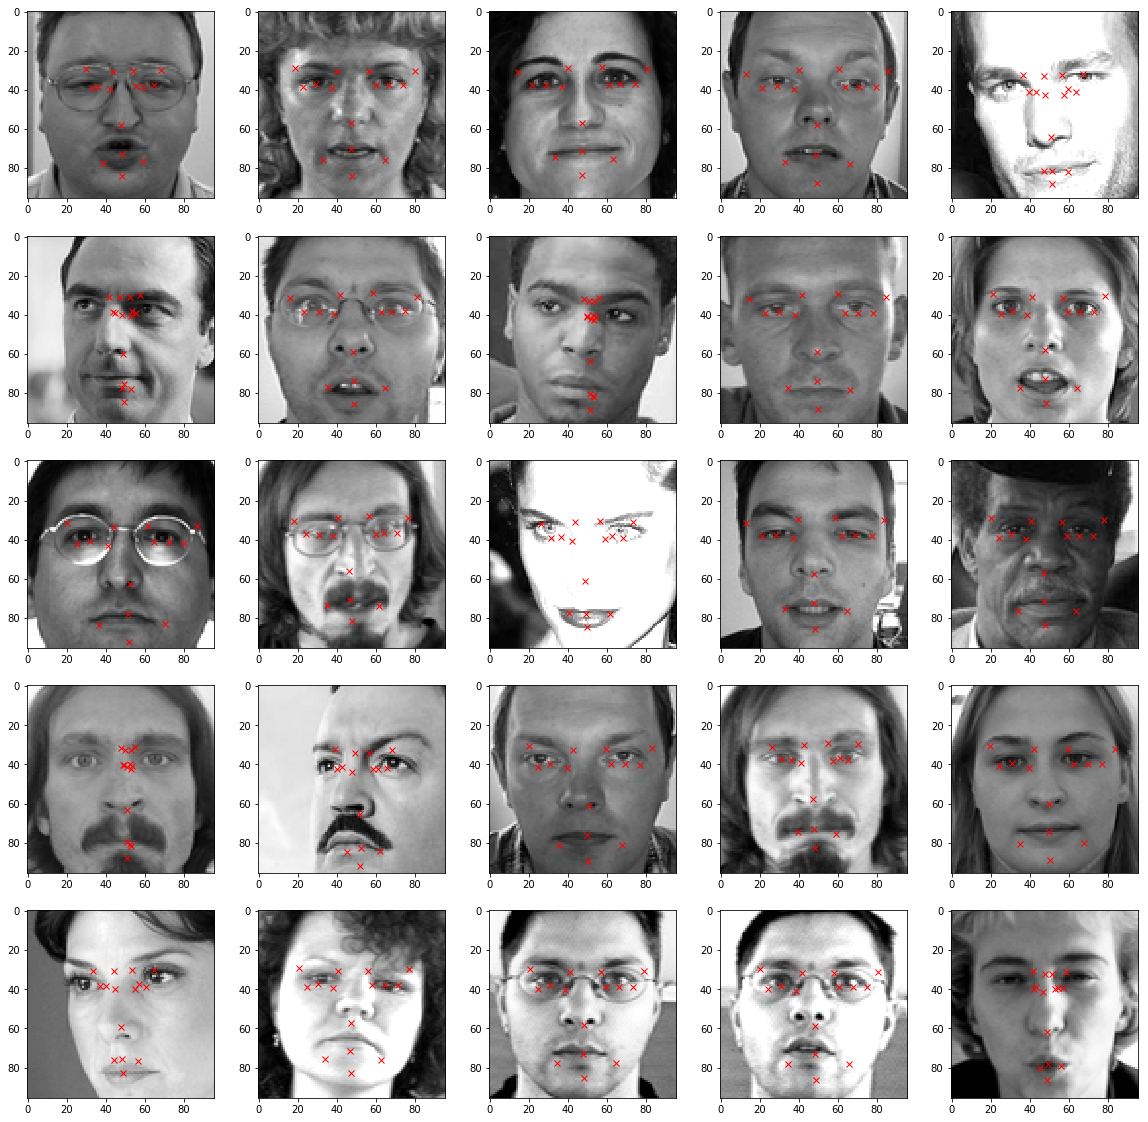

In [64]:
# Plot the test images and their predicted keypoints

fig = plt.figure(figsize=(20, 20))

for i in range(25):
    ax = fig.add_subplot(5, 5, i + 1)
    # Using squeeze to convert the image shape from (96,96,1) to (96,96)
    plt.imshow(X_test[i].squeeze(),cmap='gray')
    for j in range(1,31,2):
            plt.plot(df_predict.loc[i][j-1], df_predict.loc[i][j], 'rx')

## Making Submission

In [65]:
test_df = pd.read_csv('test.csv')

In [67]:
test_df.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


In [68]:
test_df['Image'] = test_df['Image'].apply(lambda x:np.fromstring(x,dtype=float,sep=' ').reshape(96,96))

In [70]:
img = test_df['Image']
img = img/255

In [74]:
test = np.empty((len(img),96,96,1))
for i in range(len(img)):
    test[i] = np.expand_dims(img[i],2)

In [75]:
test.shape

(1783, 96, 96, 1)

In [84]:
prediction = model.predict(test)

In [85]:
prediction_df = pd.DataFrame(prediction,columns=columns)

In [86]:
prediction_df.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,46.905788,37.992222,49.636303,38.839516,48.328201,40.383644,46.754566,39.125675,50.509304,39.399063,...,48.322174,59.222908,47.337608,78.105324,52.538635,77.062721,48.804455,74.533607,48.534760,84.934914
1,63.683041,38.505089,37.416779,39.532249,59.992645,40.201145,68.389610,39.439156,42.886429,40.887119,...,49.662930,60.215714,61.754925,79.163567,41.287720,78.236855,50.112064,76.659996,50.327072,86.904938
2,66.560760,37.729198,30.293577,38.295258,61.544983,37.918770,73.466805,37.636272,38.091358,38.952724,...,47.452843,57.552952,63.346283,76.132034,35.242542,75.365318,47.812962,72.043068,48.247162,84.097969
3,58.643959,40.715801,46.080692,41.703678,57.462360,43.473667,61.796333,41.958294,49.678864,43.087997,...,52.327023,65.033447,58.616776,84.020523,49.992180,83.275551,52.305470,82.709366,52.460815,90.553802
4,66.419769,37.873169,29.866936,37.816849,61.130024,37.485851,73.170799,37.301781,37.774498,38.708893,...,47.089260,56.572273,62.885979,75.563713,34.516220,74.612450,47.363091,70.617981,47.922066,84.152611


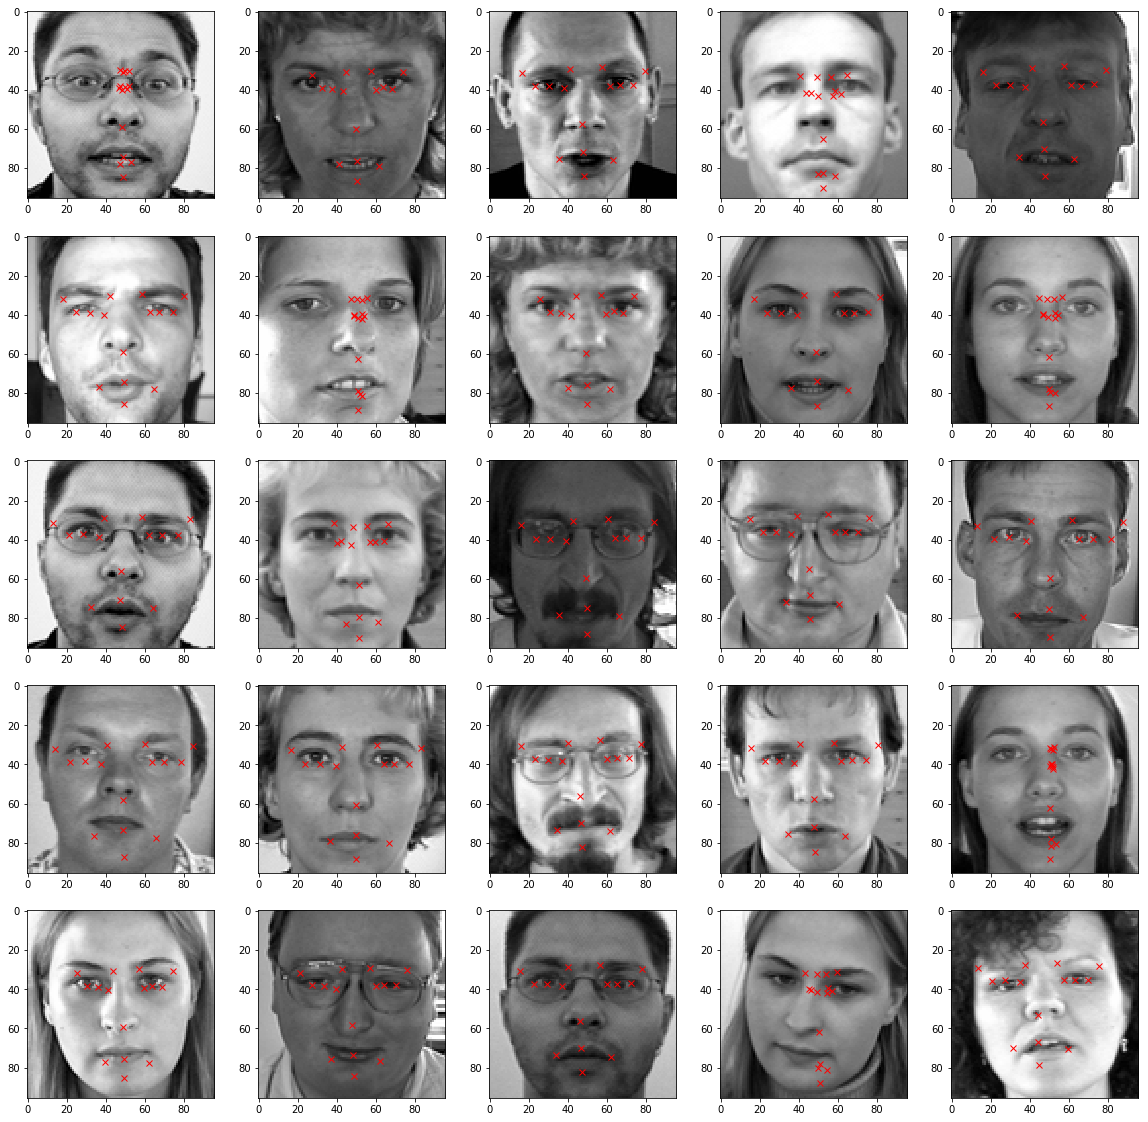

In [87]:
# Plot the test images and their predicted keypoints

fig = plt.figure(figsize=(20, 20))

for i in range(25):
    ax = fig.add_subplot(5, 5, i + 1)
    # Using squeeze to convert the image shape from (96,96,1) to (96,96)
    plt.imshow(test[i].squeeze(),cmap='gray')
    for j in range(1,31,2):
            plt.plot(prediction_df.loc[i][j-1], prediction_df.loc[i][j], 'rx')

In [83]:
#prediction_df.to_csv('submit.csv')

In [90]:
#np.savetxt('foo2.csv',prediction,delimiter=',')